In [ ]:
%pip install python-dotenv
%pip install langchain-pinecone langchain-openai langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.3/524.3 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
import getpass
import os


def _set_env(key: str):
    if key not in os.environ:
        os.environ[key] = getpass.getpass(f"{key}:")


_set_env("OPENAI_API_KEY")

OPENAI_API_KEY:··········


In [ ]:
import getpass
import os


def _set_env(key: str):
    if key not in os.environ:
        os.environ[key] = getpass.getpass(f"{key}:")
_set_env("PINECONE_API_KEY")
_set_env("PINECONE_ENVIRONMENT")

PINECONE_API_KEY:··········
PINECONE_ENVIRONMENT:··········


In [ ]:
from dotenv import load_dotenv

load_dotenv()

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import ReadTheDocsLoader
from langchain_openai import OpenAIEmbeddings
from langchain_pinecone import PineconeVectorStore

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")


def ingest_docs():
    loader = ReadTheDocsLoader("https://www.edubull.com/Content/eRepository/SubjectContent/Notes/3634.pdf")

    raw_documents = loader.load()
    print(f"loaded {len(raw_documents)} documents")

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=600, chunk_overlap=50)
    documents = text_splitter.split_documents(raw_documents)
    for doc in documents:
        new_url = doc.metadata["source"]
        # new_url = new_url.replace("langchain-docs", "https:/")
        doc.metadata.update({"source": new_url})

    print(f"Going to add {len(documents)} to Pinecone")
    PineconeVectorStore.from_documents(
        documents, embeddings, index_name="project2"
    )
    print("****Loading to vectorstore done ***")


if __name__ == "__main__":
    ingest_docs()

loaded 0 documents
Going to add 0 to Pinecone
****Loading to vectorstore done ***


In [ ]:
from dotenv import load_dotenv
from langchain.chains.retrieval import create_retrieval_chain

load_dotenv()

from langchain import hub
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_pinecone import PineconeVectorStore


from langchain_openai import ChatOpenAI, OpenAIEmbeddings


INDEX_NAME = "project2"


def run_llm(query: str):
    embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
    docsearch = PineconeVectorStore(index_name=INDEX_NAME, embedding=embeddings)
    chat = ChatOpenAI(verbose=True, temperature=0)

    retrieval_qa_chat_prompt = hub.pull("langchain-ai/retrieval-qa-chat")
    stuff_documents_chain = create_stuff_documents_chain(chat, retrieval_qa_chat_prompt)

    qa = create_retrieval_chain(
        retriever=docsearch.as_retriever(), combine_docs_chain=stuff_documents_chain
    )
    result = qa.invoke(input={"input": query})
    return result


if __name__ == "__main__":
    res = run_llm(query="What is the capital of India?")
    print(res["answer"])

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


The capital of India is New Delhi.


In [ ]:
from dotenv import load_dotenv
from langchain.chains.retrieval import create_retrieval_chain

load_dotenv()

from langchain import hub
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_pinecone import PineconeVectorStore


from langchain_openai import ChatOpenAI, OpenAIEmbeddings


INDEX_NAME = "project2"


def run_llm(query: str):
    embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
    docsearch = PineconeVectorStore(index_name=INDEX_NAME, embedding=embeddings)
    chat = ChatOpenAI(verbose=True, temperature=0)

    retrieval_qa_chat_prompt = hub.pull("langchain-ai/retrieval-qa-chat")
    stuff_documents_chain = create_stuff_documents_chain(chat, retrieval_qa_chat_prompt)

    qa = create_retrieval_chain(
        retriever=docsearch.as_retriever(), combine_docs_chain=stuff_documents_chain
    )
    result = qa.invoke(input={"input": query})
    return result


if __name__ == "__main__":
    res = run_llm(query="Tell me about the history of cricket")
    print(res["answer"])

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


Cricket is a bat-and-ball game that originated in England in the 16th century. It has since become a popular sport played in many countries around the world. The game has evolved over the centuries, with the first recorded match taking place in the 18th century. Today, cricket is played at both the amateur and professional levels, with international competitions such as the Cricket World Cup attracting millions of fans. The sport has a rich history and has produced many legendary players who have left a lasting impact on the game.


In [ ]:
loader = ReadTheDocsLoader("https://www.edubull.com/Content/eRepository/SubjectContent/Notes/3634.pdf")
raw_documents = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=600, chunk_overlap=50)
documents = text_splitter.split_documents(raw_documents)
for doc in documents:
    new_url = doc.metadata["source"]
    doc.metadata.update({"source": new_url})
retriever = PineconeVectorStore.from_documents(
    documents, embeddings, index_name="project2"
).as_retriever()


In [ ]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
    retriever,
    name="search_docs",
    description="Search the knowledge base."
)

In [ ]:
retriever_tool.invoke({"query": "How was cricket made popular?"})

''

In [ ]:
%pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 14.3 MB/s eta 0:00:00


In [ ]:
from langgraph.graph import MessagesState
from langchain_openai import ChatOpenAI

response_model = ChatOpenAI(model="gpt-4o", temperature=0)


def generate_query_or_respond(state: MessagesState):
    """Call the model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply respond to the user.
    """
    response = (
        response_model
        # highlight-next-line
        .bind_tools([retriever_tool]).invoke(state["messages"])
    )
    return {"messages": [response]}

In [ ]:
input = {"messages": [{"role": "user", "content": "hello!"}]}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hello! How can I assist you today?


In [ ]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "How was cricket spread in India?",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  search_docs (call_Eim8eWgYrofReUdMBREJxufm)
 Call ID: call_Eim8eWgYrofReUdMBREJxufm
  Args:
    query: spread of cricket in India


In [ ]:
from pydantic import BaseModel, Field
from typing import Literal

GRADE_PROMPT = (
    "You are a grader assessing relevance of a retrieved document to a user question. \n "
    "Here is the retrieved document: \n\n {context} \n\n"
    "Here is the user question: {question} \n"
    "If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n"
    "Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."
)
class GradeDocuments(BaseModel):
    """Grade documents using a binary score for relevance check."""

    binary_score: str = Field(
        description="Relevance score: 'yes' if relevant, or 'no' if not relevant"
    )
grader_model = init_chat_model("openai:gpt-4.1", temperature=0)

def grade_documents(
    state: MessagesState,
) -> Literal["generate_answer", "rewrite_question"]:
    """Determine whether the retrieved documents are relevant to the question."""
    question = state["messages"][0].content
    context = state["messages"][-1].content

    prompt = GRADE_PROMPT.format(question=question, context=context)
    response = (
        grader_model
        .with_structured_output(GradeDocuments).invoke(
            [{"role": "user", "content": prompt}]
        )
    )
    score = response.binary_score

    if score == "yes":
        return "generate_answer"
    else:
        return "rewrite_question"

In [ ]:
from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {"role": "tool", "content": "capital of India", "tool_call_id": "1"},
        ]
    )
}
grade_documents(input)

'rewrite_question'

In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "The origins of Indian cricket, that is, cricket played by Indians are to be found in Bombay.",
                "tool_call_id": "1",
            },
        ]
    )
}
grade_documents(input)

'generate_answer'

In [ ]:
REWRITE_PROMPT = (
    "Look at the input and try to reason about the underlying semantic intent / meaning.\n"
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "Formulate an improved question:"
)


def rewrite_question(state: MessagesState):
    """Rewrite the original user question."""
    messages = state["messages"]
    question = messages[0].content
    prompt = REWRITE_PROMPT.format(question=question)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [{"role": "user", "content": response.content}]}

In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {"role": "tool", "content": "capital of India", "tool_call_id": "1"},
        ]
    )
}

response = rewrite_question(input)
print(response["messages"][-1]["content"])

What were the key factors and historical events that contributed to the spread of cricket in India?


In [ ]:
GENERATE_PROMPT = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer the question. "
    "If you don't know the answer, just say that you don't know. "
    "Use three sentences maximum and keep the answer concise.\n"
    "Question: {question} \n"
    "Context: {context}"
)


def generate_answer(state: MessagesState):
    """Generate an answer."""
    question = state["messages"][0].content
    context = state["messages"][-1].content
    prompt = GENERATE_PROMPT.format(question=question, context=context)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [response]}

In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "The origins of Indian cricket, that is, cricket played by Indians are to be found in Bombay.",
                "tool_call_id": "1",
            },
        ]
    )
}

response = generate_answer(input)
response["messages"][-1].pretty_print()

================================== Ai Message ==================================

Cricket was spread in India starting from Bombay, where it was first played by Indians. The sport was introduced during British colonial rule and gradually gained popularity across the country.


In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(MessagesState)

# Define the nodes we will cycle between
workflow.add_node(generate_query_or_respond)
workflow.add_node("retrieve", ToolNode([retriever_tool]))
workflow.add_node(rewrite_question)
workflow.add_node(generate_answer)

workflow.add_edge(START, "generate_query_or_respond")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "generate_query_or_respond",
    # Assess LLM decision (call `retriever_tool` tool or respond to the user)
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate_answer", END)
workflow.add_edge("rewrite_question", "generate_query_or_respond")
# Compile
graph = workflow.compile()

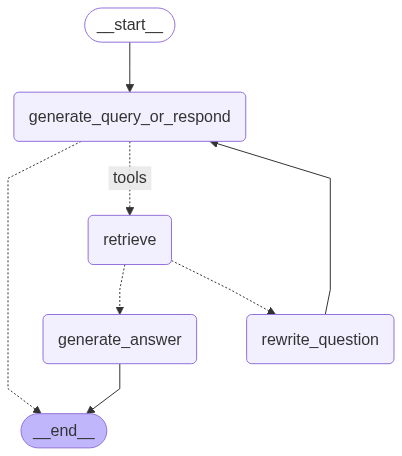

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            }
        ]
    }
):
  for node, update in chunk.items():
        print("Update from node:", node)
        last_msg = update.get("messages", [])[-1]
        if hasattr(last_msg, "pretty_print"):
            last_msg.pretty_print()
        else:
            print(last_msg)
        print("\n\n")

Update from node: generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  search_docs (call_GAhR9ToqzIlvPlqN49w6hCol)
 Call ID: call_GAhR9ToqzIlvPlqN49w6hCol
  Args:
    query: spread of cricket in India



Update from node: retrieve
================================= Tool Message =================================
Name: search_docs





Update from node: rewrite_question
{'role': 'user', 'content': 'What were the historical factors and events that contributed to the spread of cricket in India?'}



Update from node: generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  search_docs (call_jebEqS2zESiq7PysiRpW9b3q)
 Call ID: call_jebEqS2zESiq7PysiRpW9b3q
  Args:
    query: historical factors events spread of cricket in India



Update from node: retrieve
================================= Tool Message =================================
Name: search_docs





Upd